# Abstract:

This project focuses on enhancing the recommendation capabilities of Amazon by implementing two distinct methods: content-based methods and collaborative filtering methods. The goal is to design and implement at least one model for each method, utilizing these approaches to provide personalized and accurate suggestions to users. The dataset used for this task is related to over 2 million customer reviews and ratings of Beauty-related products on Amazon.

# Amazon Ratings (Beauty Products) - Content-Based Methods

# Introduction:

Amazon's recommendation system is a critical component of its success, leveraging customer reviews and purchase history. In this project, we delve into the Content-Based Methods, focusing on creating personalized shopping guides for Beauty Products on Amazon. The dataset in question comprises over 2 million customer reviews and ratings, offering a comprehensive view of user preferences and product details.

# Dataset Description:

The dataset contains essential information such as unique UserId, product ASIN (Amazon's unique product identification code), Ratings ranging from 1-5 based on customer satisfaction, and the Timestamp of the rating. The rich dataset spans from May 1996 to July 2014, providing a historical context for the analysis. This dataset serves as the foundation for implementing content-based recommendation methods.

# Content-Based Methods Approach:

### Dataset Features:

- UserId
- ProductId (ASIN)
- Rating
- Timestamp
Content-Based Methods involve creating personalized recommendations by analyzing user and product profiles. Features such as product descriptions, categories, and timestamps will be crucial in forming these profiles. The preprocessing steps include feature engineering and selection to enhance the model's ability to provide tailored suggestions to users.

Methodology:

* Feature Engineering: Utilizing product descriptions and categories to create informative features for content analysis.
* User and Product Profiles: Forming detailed profiles for users and products based on the engineered features.
* Model Implementation: Designing and implementing a content-based recommendation model to provide personalized suggestions.
* Evaluation: Assessing the model's effectiveness in handling the extensive product range on Amazon.

Innovation and Exploration:
Exploration and testing of advanced algorithms will be conducted to uncover innovative insights, potentially leading to improved recommendation accuracy.

# BigBasket Entire Product List - Collaborative Filtering Methods

# Introduction:

BigBasket, India's largest online grocery supermarket, has become a staple for many consumers. In this project, we aim to enhance the recommendation capabilities of BigBasket by implementing Collaborative Filtering Methods. As the e-commerce industry continues to thrive, understanding user preferences becomes paramount, and collaborative filtering offers a team-based approach to achieving this goal.

# Dataset Description:

The dataset comprises 10 attributes, including product titles, categories, brands, sale prices, market prices, and ratings. These attributes provide valuable insights into user preferences and product characteristics. The creation of a "discount" feature during feature engineering enhances the dataset's richness for a more comprehensive analysis.

# Collaborative Filtering Methods Approach:

### Dataset Features:

- Index
- Product
- Category
- Sub_category
- Brand
- Sale_price
- Market_price
- Type
- Rating
- Description
Collaborative Filtering Methods consider the preferences of users with similar tastes, generating suggestions based on observed patterns in user behavior. The "discount" feature adds an additional layer for understanding consumer choices. Feature engineering and collaborative filtering techniques will be employed to provide accurate recommendations.

Methodology:

- Feature Engineering: Creating the "discount" feature and exploring its impact on user preferences.
- User Preferences: Analyzing user behavior and preferences based on ratings and product attributes.
- Collaborative Filtering: Implementing a collaborative filtering model to generate suggestions based on similar user tastes.
- Model Evaluation: Assessing the model's adaptability to the dynamic online grocery store with a diverse product range.

Innovation and Exploration:
The project encourages exploration and testing of advanced collaborative filtering algorithms for potential improvements in recommendation accuracy.

### Amazon Ratings (Beauty Products) - Content-Based Methods

#### Import library 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline
plt.style.use("ggplot")
import plotly.graph_objects as go

import sklearn
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer


from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#### import the data

In [3]:
amazon_ratings = pd.read_csv('../input/amazon-ratings/ratings_Beauty.csv')
amazon_ratings['user_id'] = pd.factorize(amazon_ratings['UserId'])[0]
amazon_ratings.head(5)

,UserId,ProductId,Rating,Timestamp,user_id
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,0
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,1
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,3
4,A3IAAVS479H7M7,0737104473,1.0,1274227200,4


#### Data Preprocessing and EDA

In [7]:
def get_percent_missing(df):
        percent_missing = df.isnull().sum() * 100 / len(df)
        missing_value_df = pd.DataFrame({'column_name': df.columns,
                                             'percent_missing': percent_missing})
        missing_value_df.sort_values('percent_missing', inplace=True)
        percent_missing = df.isnull().sum() * 100 / len(df)
        
        print('Percentage of Missing Values: ')

        return percent_missing

Returns the number of unique values and unique values for each feature in the given dataframe.

In [8]:
 def unique_counts(df):
        unique_counts = df.nunique()
        unique_values = [df[column].unique() for column in df.columns]
        data_types = [str(df[column].dtype) for column in df.columns]
        unique_counts_df = pd.DataFrame({'feature': df.columns, 'unique_count': unique_counts, 'unique_values': unique_values, 'data_type': data_types})
        return unique_counts_df

This function provides basic insights about a dataframe.

In [13]:
 def dataframe_insights(df):
        insights = {}
        insights['Number of records'] = len(df)
        insights['Number of columns'] = len(df.columns)
        insights['Columns'] = list(df.columns)
        insights['Number of unique values in each column'] = df.nunique().to_dict()
        insights['Missing values'] = df.isnull().sum().sum()
        insights['Percentage of missing values in each column'] = (df.isnull().sum() / len(df) * 100).round(2).to_dict()
        insights['Data types'] = df.dtypes.to_dict()
        insights['Summary statistics'] = df.describe().to_dict()
        numeric_df = df.select_dtypes(include='number')
        insights['Correlation matrix'] = numeric_df.corr().to_dict()
        insights['Number of duplicated rows'] = len(df[df.duplicated()])
        insights['Duplicate rows'] = list(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).to_dict('index').values())
        return insights

In [10]:
unique_counts(amazon_ratings)

,feature,unique_count,unique_values,data_type
UserId,UserId,1210271,"[A39HTATAQ9V7YF, A3JM6GV9MNOF9X, A1Z513UWSAAO0...",object
ProductId,ProductId,249274,"[0205616461, 0558925278, 0733001998, 073710447...",object
Rating,Rating,5,"[5.0, 3.0, 4.0, 1.0, 2.0]",float64
Timestamp,Timestamp,4231,"[1369699200, 1355443200, 1404691200, 138257280...",int64
user_id,user_id,1210271,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",int64


In [11]:
get_percent_missing(amazon_ratings)

Percentage of Missing Values: 


UserId       0.0
ProductId    0.0
Rating       0.0
Timestamp    0.0
user_id      0.0
dtype: float64

In [17]:
print(dataframe_insights(amazon_ratings))

{'Number of records': 2023070, 'Number of columns': 5, 'Columns': ['UserId', 'ProductId', 'Rating', 'Timestamp', 'user_id'], 'Number of unique values in each column': {'UserId': 1210271, 'ProductId': 249274, 'Rating': 5, 'Timestamp': 4231, 'user_id': 1210271}, 'Missing values': 0, 'Percentage of missing values in each column': {'UserId': 0.0, 'ProductId': 0.0, 'Rating': 0.0, 'Timestamp': 0.0, 'user_id': 0.0}, 'Data types': {'UserId': dtype('O'), 'ProductId': dtype('O'), 'Rating': dtype('float64'), 'Timestamp': dtype('int64'), 'user_id': dtype('int64')}, 'Summary statistics': {'Rating': {'count': 2023070.0, 'mean': 4.149035871225415, 'std': 1.31150457371216, 'min': 1.0, '25%': 4.0, '50%': 5.0, '75%': 5.0, 'max': 5.0}, 'Timestamp': {'count': 2023070.0, 'mean': 1360388736.5637374, 'std': 46118604.216807574, 'min': 908755200.0, '25%': 1350259200.0, '50%': 1372809600.0, '75%': 1391472000.0, 'max': 1406073600.0}, 'user_id': {'count': 2023070.0, 'mean': 503609.29144863994, 'std': 353574.97991

### Insights from Amazon Dataset
#### Number of Records and Columns:

- The dataset contains 2,023,070 records and 5 columns.

#### Column Information:

- UserId: Unique identification for each customer (1,210,271 unique values).
- ProductId: Unique identification code for each product (249,274 unique values).
- Rating: Ratings ranging from 1 to 5.
- Timestamp: Time at which the rating was recorded (4,231 unique values).
- user_id: Additional user identification (1,210,271 unique values).

#### Missing Values:

- There are no missing values in any of the columns.

#### Data Types:

- UserId and ProductId are of object type, Rating is of float64 type, and Timestamp and user_id are of int64 type.

#### Summary Statistics:

- Rating: Mean rating is approximately 4.15, with a standard deviation of 1.31. Ratings range from 1 to 5.
- Timestamp: Mean timestamp corresponds to approximately 1360 seconds since UNIX epoch. The dataset spans a considerable timeframe.
- user_id: Mean user_id is around 503,609, with a standard deviation of 353,574.

#### Correlation Matrix:

- Rating and Timestamp: Negligible correlation (0.00033).
- Rating and user_id: Weak negative correlation (-0.03).
- Timestamp and user_id: Moderate positive correlation (0.26).

#### Number of Duplicated Rows:

- There are no duplicated rows in the dataset.

#### Interpretation

- Ratings Distribution: Ratings are generally positive, with a mean rating close to 4.15. Most ratings fall within the 4 to 5 range.

- Time Span: The dataset covers a substantial time span, indicated by the wide range of timestamps.

- User Identification: The user_id and UserId columns seem to represent similar information, but user_id has a more consistent numeric format. Further investigation is needed to understand the relationship between the two.

- Correlation Analysis: The weak correlation between Rating and user_id suggests that user-specific characteristics may not heavily influence the ratings. The positive correlation between Timestamp and user_id indicates a potential temporal pattern in user activities.

- Data Integrity: No missing values or duplicates were found, indicating a well-maintained dataset.

In [18]:
# Calculate the frequency of ratings
rating_counts = amazon_ratings['Rating'].value_counts().sort_index()

In [19]:
# Create the bar chart using Plotly
fig = go.Figure(data=go.Bar(x=rating_counts.index, y=rating_counts.values))

fig.update_layout(
    title='Frequency of Ratings',
    xaxis_title='Rating',
    yaxis_title='Frequency',
    xaxis=dict(type='category'),
    yaxis=dict(type='linear'),
    plot_bgcolor='white',  # Set the background color
    bargap=0.2,  # Set the gap between bars
    bargroupgap=0.1,  # Set the gap between groups of bars
    font=dict(
        family='Arial',  # Set the font family
        size=14,  # Set the font size
        color='black'  # Set the font color
    )
)

fig.show()

In [20]:
# Calculate average rating for each product
product_ranking = amazon_ratings.groupby(['ProductId'])['Rating'].mean().reset_index().sort_values(by = 'Rating', ascending=False)
product_ranking

,ProductId,Rating
0,0205616461,5.0
135683,B00551HYQC,5.0
135663,B0054ZSIXC,5.0
135667,B00550UX52,5.0
135668,B00550YQP0,5.0
...,...,...
137246,B00586PNN0,1.0
137239,B00585I1VW,1.0
137235,B005854H5G,1.0
137222,B00583Q2MY,1.0


The provided dataset contains information about various products, including their unique identifiers ('ProductId') and associated ratings ('Rating'). To gain insights into the overall satisfaction level for each product, an analysis was conducted to calculate the average rating.

The resulting table presents the 'ProductId' alongside its corresponding average rating, summarizing the collective feedback received. 
The table showcases the diversity of products within the dataset, ranging from those consistently receiving high ratings to those with more mixed reviews. 


In [21]:
# Create a distribution chart using Plotly
fig = go.Figure(data=[go.Histogram(x=product_ranking['Rating'], nbinsx=10)])

fig.update_layout(
    title="Average Rating Distribution",
    xaxis_title="Rating",
    yaxis_title="Count",
    bargap=0.1,
    bargroupgap=0.1
)

fig.update_traces(marker_color='rgba(50, 171, 96, 0.6)')

fig.show()

In [22]:
products_ratings = amazon_ratings.pivot_table(index='ProductId', columns='Rating', values='Timestamp', aggfunc='count', fill_value=0)
products_ratings.columns = ['Rating ' + str(col) for col in products_ratings.columns]
products_ratings['Frequency'] = products_ratings.sum(axis=1)

In [23]:
# Extract data from the dataframe
df = products_ratings.sort_values('Frequency', ascending=False).head(10)

ratings = df[['Rating 1.0', 'Rating 2.0', 'Rating 3.0', 'Rating 4.0', 'Rating 5.0']].values
product_ids = df.index.values

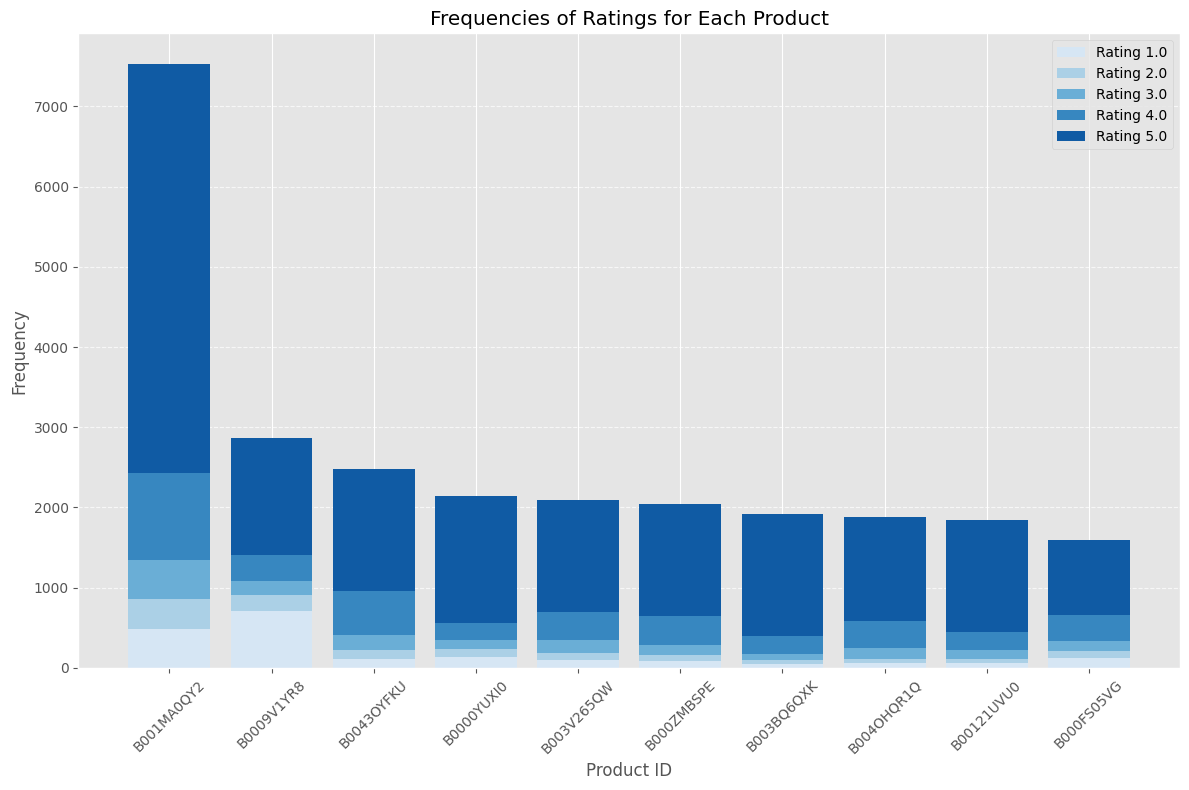

In [24]:
# Define a blue color palette
colors = sns.color_palette('Blues', n_colors=5)

# Plot the bar chart with a white background
plt.figure(figsize=(12, 8), facecolor='w')
for i in range(5):
    plt.bar(product_ids, ratings[:, i], bottom=ratings[:, :i].sum(axis=1), color=colors[i], label='Rating ' + str(i+1) + '.0')

# Customize the plot
plt.xlabel('Product ID')
plt.ylabel('Frequency')
plt.title('Frequencies of Ratings for Each Product')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

In [25]:
# Pivot the table to get ratings as columns and count frequency
users_ratings = amazon_ratings.pivot_table(index='user_id', columns='Rating', aggfunc='size', fill_value=0)

In [26]:
# Add the 'Frequency' column
users_ratings['Frequency'] = users_ratings.sum(axis=1)

In [27]:
# Rename the columns
users_ratings.columns = ['Rating ' + str(col) for col in users_ratings.columns]

In [29]:
# Reset the index to make 'UserId' a regular column
users_ratings = users_ratings.reset_index()
users_ratings = users_ratings.sort_values(by = 'Rating Frequency', ascending = False)

In [30]:
# Set the 'UserId' column as the index
users_ratings.set_index('user_id', inplace=True)
users_ratings.head(10)

,index,Rating 1.0,Rating 2.0,Rating 3.0,Rating 4.0,Rating 5.0,Rating Frequency
user_id,,,,,,,
847,847,27,49,60,129,124,389
3905,3905,0,0,16,38,282,336
2287,2287,1,6,22,125,172,326
10293,10293,4,13,20,67,174,278
107881,107881,0,9,14,69,184,276
8351,8351,183,6,6,3,77,275
4229,4229,10,9,6,23,221,269
1822,1822,7,24,46,75,107,259
45464,45464,16,27,52,41,113,249


<Figure size 1600x800 with 0 Axes>

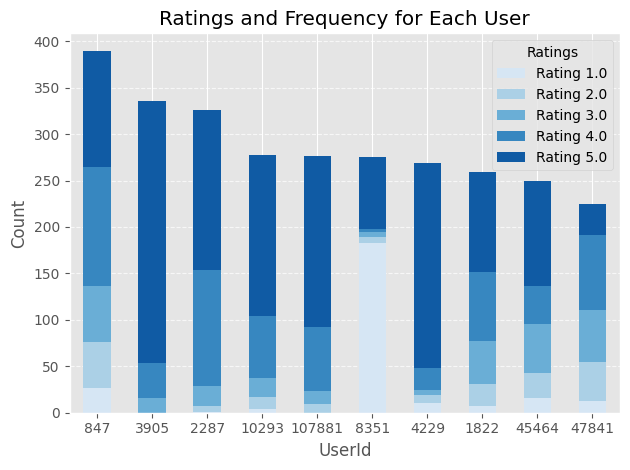

In [31]:
# Use a blue color palette
colors = sns.color_palette('Blues', n_colors=5)

# Plot the bar chart with a wider figure
plt.figure(figsize=(16, 8))
users_ratings[['Rating 1.0', 'Rating 2.0', 'Rating 3.0', 'Rating 4.0', 'Rating 5.0']].head(10).plot(kind='bar', stacked=True, color=colors)

# Customize the plot
plt.xlabel('UserId')
plt.ylabel('Count')
plt.title('Ratings and Frequency for Each User')
plt.xticks(rotation=0)
plt.legend(title='Ratings', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

### Content based recommedations 

In [32]:
def recommend_products(user_id, user_item_matrix):
    # Get the products that the user has not rated yet.
    unrated_products_index = pd.Index(pd.isna(user_item_matrix[user_id]))

    # Predict the ratings for the unrated products.
    predicted_ratings = user_item_matrix.dot(svd.inverse_transform(user_item_matrix[user_id]))

    # Sort the predicted ratings by descending order.
    predicted_ratings = np.array(predicted_ratings).argsort()[::-1]

    # Return the top-k recommended products.
    return user_item_matrix.columns[unrated_products_index][predicted_ratings[:5]]

In [33]:
# Function to generate recommendations for a user
def generate_recommendations(user_id, top_n):
    user_ratings = user_item_matrix.loc[user_id]
    user_predictions = item_sim_matrix.dot(user_ratings)
    recommended_indices = user_predictions.argsort()[-top_n:][::-1]
    recommended_products = user_item_matrix.columns[recommended_indices]
    return recommended_products

In [35]:
amazon_ratings1 = amazon_ratings.head(30000)
amazon_ratings1 = amazon_ratings1.sort_values(by = 'user_id', ascending = True)
amazon_ratings1.head(4)

,UserId,ProductId,Rating,Timestamp,user_id
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200,0
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200,1
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200,2
3,A1WMRR494NWEWV,0733001998,4.0,1382572800,3


In [36]:
%%time
user_item_matrix = amazon_ratings1.pivot_table(index='user_id', columns='ProductId', values='Rating', fill_value=0)
user_item_matrix

CPU times: user 2.66 s, sys: 1.41 s, total: 4.07 s
Wall time: 3.86 s


ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B00007KH0O,B00007KQF3,B00007KUSE,B00007L1HG,B00007L1HT,B00007L1IE,B00007L64J,B00007LB75,B00007LVDA,B00007M0CP
user_id,,,,,,,,,,,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28453,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
28454,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
28455,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
svd = TruncatedSVD(n_components=100)

# Fit the TruncatedSVD object to the user-item matrix.
user_item_matrix_svd = svd.fit_transform(user_item_matrix)

In [38]:
pd.DataFrame(user_item_matrix_svd)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.995898e-15,-1.356046e-15,-1.849236e-17,-3.605864e-16,5.668445e-16,-2.157272e-15,1.085730e-15,1.435607e-15,5.647849e-15,-2.383690e-15,...,-3.953764e-11,3.311079e-11,-3.196659e-12,5.894971e-11,-4.438542e-11,-3.586535e-11,3.932951e-11,1.481609e-10,-4.033411e-11,5.179993e-11
1,5.566237e-16,-6.659261e-16,3.010254e-17,1.177943e-15,-2.571686e-15,6.560597e-15,-8.487505e-15,-7.643942e-15,1.404686e-14,2.844618e-15,...,-1.452054e-10,-8.009830e-11,-1.696394e-10,5.674831e-10,-3.118389e-10,2.862573e-10,-3.725988e-10,-4.858920e-10,2.482828e-10,1.841488e-10
2,9.277062e-16,-1.109877e-15,5.017090e-17,1.963238e-15,-4.286144e-15,1.093433e-14,-1.414584e-14,-1.273990e-14,2.341144e-14,4.741030e-15,...,-2.420089e-10,-1.334972e-10,-2.827324e-10,9.458052e-10,-5.197314e-10,4.770954e-10,-6.209979e-10,-8.098200e-10,4.138047e-10,3.069146e-10
3,-2.411404e-17,5.228713e-17,2.768311e-17,-1.164370e-16,4.014427e-16,-5.308818e-16,-1.261677e-16,-2.325294e-16,-4.613646e-16,1.636774e-16,...,-1.779382e-12,1.068370e-12,-2.189242e-12,-1.567410e-11,1.294619e-12,-3.456749e-12,1.282355e-12,-3.466105e-12,4.165326e-12,3.668752e-12
4,-6.723636e-18,-3.115208e-18,2.053974e-19,4.187935e-17,2.623208e-17,-1.271808e-18,-4.590867e-17,-9.645223e-17,-5.455726e-18,7.359828e-17,...,-1.273085e-18,-7.033330e-20,-1.595578e-18,-1.160386e-18,-2.954457e-18,-7.608836e-19,-1.314831e-18,7.182379e-20,1.708363e-18,-1.367055e-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28453,3.672304e-03,4.936463e-07,2.644957e-04,-6.057693e-05,3.897214e-05,9.430979e-05,-9.466499e-06,8.672875e-05,8.103511e-06,2.928134e-04,...,3.133253e-04,3.117652e-03,7.114828e-03,-1.507011e-02,5.208236e-03,1.007106e-02,-5.170964e-03,-2.653812e-03,1.835134e-03,-1.884941e-03
28454,3.672304e-03,4.936463e-07,2.644957e-04,-6.057693e-05,3.897214e-05,9.430979e-05,-9.466499e-06,8.672875e-05,8.103511e-06,2.928134e-04,...,3.133253e-04,3.117652e-03,7.114828e-03,-1.507011e-02,5.208236e-03,1.007106e-02,-5.170964e-03,-2.653812e-03,1.835134e-03,-1.884941e-03
28455,1.836152e-03,2.468231e-07,1.322479e-04,-3.028847e-05,1.948607e-05,4.715490e-05,-4.733250e-06,4.336438e-05,4.051755e-06,1.464067e-04,...,1.566626e-04,1.558826e-03,3.557414e-03,-7.535053e-03,2.604118e-03,5.035531e-03,-2.585482e-03,-1.326906e-03,9.175668e-04,-9.424704e-04
28456,1.836152e-03,2.468231e-07,1.322479e-04,-3.028847e-05,1.948607e-05,4.715490e-05,-4.733250e-06,4.336438e-05,4.051755e-06,1.464067e-04,...,1.566626e-04,1.558826e-03,3.557414e-03,-7.535053e-03,2.604118e-03,5.035531e-03,-2.585482e-03,-1.326906e-03,9.175668e-04,-9.424704e-04


In [39]:
# Get the user ID of the user you want to recommend products to.
user_id = amazon_ratings1['user_id'].value_counts().idxmax()

# Recommend products to the user.
recommended_products = user_item_matrix_svd[user_id].argsort()[::-1][:5]

# Print the recommended products.
print(recommended_products)

[72 41 45 68 92]


In [41]:
# Calculate item-item similarity matrix (cosine similarity)
item_sim_matrix = np.dot(user_item_matrix.T, user_item_matrix)

In [42]:
user_id = amazon_ratings1['user_id'].value_counts().idxmax()
top_n = 3

recommendations = generate_recommendations(user_id, top_n)
print(f"Top {top_n} Recommendations for User {user_id}: {recommendations}")

Top 3 Recommendations for User 3905: Index(['B0000535RA', 'B0000535UT', 'B0000535UM'], dtype='object', name='ProductId')


In [43]:
pd.DataFrame(item_sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857
0,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,25,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,50,0,0,0,0
1854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,41,0,0,0
1855,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,69,0,0
1856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0


In [44]:
pd.DataFrame(cosine_similarity(user_item_matrix.T))

,0,1,2,3,4,5,6,7,8,9,...,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [46]:
%%time
user_similarity = cosine_similarity(user_item_matrix)

CPU times: user 1min 34s, sys: 7.57 s, total: 1min 41s
Wall time: 29.9 s


In [47]:
pd.DataFrame(user_similarity)

,0,1,2,3,4,5,6,7,8,9,...,28448,28449,28450,28451,28452,28453,28454,28455,28456,28457
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
28456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [48]:
# Calculate item-item similarity matrix
items_sim_matrix = cosine_similarity(user_item_matrix.T)
pd.DataFrame(items_sim_matrix)

,0,1,2,3,4,5,6,7,8,9,...,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1855,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [49]:
X = user_item_matrix.T
X1 = X
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
print(decomposed_matrix.shape)
pd.DataFrame(decomposed_matrix)

(1858, 10)


,0,1,2,3,4,5,6,7,8,9
0,4.628828e-15,4.956698e-15,8.744987e-16,6.245678e-15,-6.465917e-14,4.239585e-14,-6.760012e-14,-1.402009e-13,8.011359e-14,1.635467e-13
1,9.437249e-15,-1.432601e-15,-5.540493e-14,-1.398760e-14,1.293530e-13,-2.392454e-13,-5.798805e-13,7.085514e-13,-2.930750e-13,-8.375962e-13
2,5.346468e-17,-1.188375e-16,-9.458596e-16,2.254325e-17,2.186042e-15,-2.249063e-15,-2.493750e-15,2.626255e-15,-8.202234e-15,-5.055606e-15
3,6.722039e-17,9.029929e-17,-1.639210e-17,-1.679166e-17,-6.980193e-16,8.109247e-17,-3.041612e-16,-1.977877e-16,-7.936700e-16,-1.428080e-16
4,-2.283322e-15,9.207037e-16,1.282025e-15,-3.631356e-15,1.644924e-15,-9.448446e-15,8.225285e-14,1.318000e-15,1.049952e-14,-1.184861e-13
...,...,...,...,...,...,...,...,...,...,...
1853,2.252035e-13,-1.217057e-13,2.928606e-13,5.457624e-13,-1.398592e-12,1.353291e-14,-1.238761e-12,5.869111e-13,7.384816e-12,2.031955e-12
1854,-8.632843e-14,-7.301818e-14,-1.402788e-13,-2.353321e-13,8.208679e-13,-4.287569e-13,2.671415e-12,-6.225943e-13,-1.079120e-12,-2.443269e-12
1855,1.942311e-12,3.110536e-12,3.691750e-12,3.949340e-12,-2.488908e-11,6.232038e-12,-3.083974e-11,3.993698e-11,-1.427778e-11,-2.463254e-12
1856,-6.984005e-16,4.335547e-16,-8.549571e-15,5.142278e-15,1.706584e-14,-1.271632e-14,4.616729e-14,-6.233555e-14,-9.283994e-14,-1.416991e-13


In [50]:
correlation_matrix = np.corrcoef(decomposed_matrix)
print(correlation_matrix.shape)
pd.DataFrame(correlation_matrix)

(1858, 1858)


,0,1,2,3,4,5,6,7,8,9,...,1848,1849,1850,1851,1852,1853,1854,1855,1856,1857
0,1.000000,-0.748238,-0.759203,0.068128,-0.678943,0.194793,0.391083,-0.803087,0.193954,-0.442437,...,-0.670925,-0.704634,-0.713747,-0.922789,-0.431639,0.528257,-0.657267,-0.209618,-0.602974,-0.698473
1,-0.748238,1.000000,0.744518,0.044966,0.263255,-0.539653,-0.249146,0.393546,-0.540058,0.092829,...,0.859729,0.831327,0.558440,0.540209,0.179225,-0.209440,0.082019,0.625293,0.240536,0.209614
2,-0.759203,0.744518,1.000000,0.322412,0.199606,0.054087,0.081863,0.259361,0.054003,-0.075609,...,0.382157,0.574668,0.284151,0.735961,-0.225568,-0.784902,0.350798,0.381672,0.548657,0.619205
3,0.068128,0.044966,0.322412,1.000000,-0.184825,0.247284,0.210602,-0.263982,0.247171,-0.650681,...,-0.283938,0.043463,-0.420176,-0.114853,-0.429264,-0.462883,-0.109375,0.511373,0.190311,0.153962
4,-0.678943,0.263255,0.199606,-0.184825,1.000000,-0.352172,-0.850875,0.925843,-0.350289,0.817559,...,0.352446,0.205161,0.834059,0.742426,0.627010,-0.220962,0.878511,-0.295138,0.761463,0.637278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1853,0.528257,-0.209440,-0.784902,-0.462883,-0.220962,-0.476466,-0.162181,-0.195418,-0.477077,0.062190,...,0.139739,-0.189888,-0.059257,-0.671821,0.324152,1.000000,-0.566112,0.001621,-0.692694,-0.758152
1854,-0.657267,0.082019,0.350798,-0.109375,0.878511,0.070354,-0.548562,0.782405,0.072259,0.706835,...,0.044564,0.032928,0.627742,0.847281,0.335966,-0.566112,1.000000,-0.491848,0.880667,0.856662
1855,-0.209618,0.625293,0.381672,0.511373,-0.295138,-0.253318,0.171291,-0.097236,-0.254417,-0.573829,...,0.521836,0.695663,-0.123398,-0.129244,0.024177,0.001621,-0.491848,1.000000,-0.309770,-0.246333
1856,-0.602974,0.240536,0.548657,0.190311,0.761463,-0.049462,-0.522732,0.579135,-0.047919,0.503516,...,0.019920,0.049464,0.570239,0.803471,0.016411,-0.692694,0.880667,-0.309770,1.000000,0.809346


In [51]:
# Function to generate recommendations for a user
def generate_recommendations(user_id, top_n):
    user_ratings = user_item_matrix.loc[user_id]
    user_predictions = np.dot(item_sim_matrix, user_ratings)
    user_predictions = np.where(user_ratings > 0, -1, user_predictions)  # Set already rated items to -1
    recommended_indices = np.argsort(user_predictions)[-top_n:][::-1]
    recommended_products = user_item_matrix.columns[recommended_indices]
    return recommended_products

In [52]:
users_ratings.head(10)

,index,Rating 1.0,Rating 2.0,Rating 3.0,Rating 4.0,Rating 5.0,Rating Frequency
user_id,,,,,,,
847,847,27,49,60,129,124,389
3905,3905,0,0,16,38,282,336
2287,2287,1,6,22,125,172,326
10293,10293,4,13,20,67,174,278
107881,107881,0,9,14,69,184,276
8351,8351,183,6,6,3,77,275
4229,4229,10,9,6,23,221,269
1822,1822,7,24,46,75,107,259
45464,45464,16,27,52,41,113,249


In [53]:
amazon_ratings1['UserId'].value_counts().idxmax()

'A281NPSIMI1C2R'

In [54]:
amazon_ratings1[amazon_ratings1['UserId'] == amazon_ratings1['UserId'].value_counts().idxmax()].sort_values(by = 'ProductId', ascending = False)

,UserId,ProductId,Rating,Timestamp,user_id
26825,A281NPSIMI1C2R,B00006IGL8,5.0,1121817600,3905
26793,A281NPSIMI1C2R,B00006IGL5,5.0,1128211200,3905
26783,A281NPSIMI1C2R,B00006IGL4,5.0,1121817600,3905
26771,A281NPSIMI1C2R,B00006IGL3,5.0,1130630400,3905
26755,A281NPSIMI1C2R,B00006IGL2,5.0,1169337600,3905
26431,A281NPSIMI1C2R,B00006FE30,5.0,1085356800,3905
26219,A281NPSIMI1C2R,B00006AG74,4.0,1052611200,3905
26206,A281NPSIMI1C2R,B000069J49,5.0,1053561600,3905
23527,A281NPSIMI1C2R,B00005V9TI,5.0,1067817600,3905
23521,A281NPSIMI1C2R,B00005V61K,5.0,1143331200,3905


In [55]:
i = "B00006IGL8"

product_names = list(X.index)
product_ID = product_names.index(i)
print(product_ID)

correlation_product_ID = correlation_matrix[product_ID]
print(correlation_product_ID.shape)

Recommend = list(X.index[correlation_product_ID > 0.95])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

1736
(1858,)


['B000050B6X',
 'B000050FET',
 'B0000531C9',
 'B0000532ZI',
 'B00005331J',
 'B000053321',
 'B0000535UN',
 'B0000535V2',
 'B0000537S1']

In [56]:
# Example usage
user_id = amazon_ratings1['user_id'].value_counts().idxmax()
top_n = 3

recommendations = generate_recommendations(user_id, top_n)
print(f"Recommendations for User {user_id}: {recommendations}")

Recommendations for User 3905: Index(['B000052YOL', 'B000055Z3C', 'B000052YM7'], dtype='object', name='ProductId')


### BigBasket Entire Product List - Collaborative Filtering Methods

#### import packages.


In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from scipy.sparse import hstack
from sklearn.cluster import KMeans
from tqdm import tqdm
import pickle
import re

Loading the .csv file to pandas

In [59]:
data=pd.read_csv('/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')
data.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


Checking the shape of the data i.e. the number of rows and columns present in the data.

In [60]:
print ('Number of data points : ', data.shape[0],'\nNumber of features/variables:', data.shape[1])

Number of data points :  27555 
Number of features/variables: 10


In [61]:
# each product/item has 10 features in the raw dataset.
data.columns

Index(['index', 'product', 'category', 'sub_category', 'brand', 'sale_price',
       'market_price', 'type', 'rating', 'description'],
      dtype='object')

To know column names and missing values

In [62]:
# info about the data features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB


In [63]:
# to know null values in each column/feature
data.isnull().sum()

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

Of these 10 features, we will be using only 6 features for our Model.

category - Category into which product has been classified-11 unique categories
sub_category - Subcategory into which product has been kept-90 unique sub_categories
brand - Brand of the product-2314 unique brands
type- Type into which product falls-426 unique types
sale_price - Price at which product is being sold on the site
description- Description of the product (in detail)
In addition to the above 6 features we will use newly built feature discount on product(i.e, market price-sell price/market price) , to rank the order of Recommended products

In [64]:
# creating new column discount_%
data['discount_%']=(data['market_price']-data['sale_price'])/data['market_price']

In [65]:
# selecting the required columns from dataframe for our analysis and model building
data=data[['product','category','sub_category','brand','type','description','sale_price','market_price','discount_%']]
data.head()

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,Hair Oil & Serum,This Product contains Garlic Oil that is known...,220.0,220.0,0.000000
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,Water & Fridge Bottles,"Each product is microwave safe (without lid), ...",180.0,180.0,0.000000
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,Lamp & Lamp Oil,"A perfect gift for all occasions, be it your m...",119.0,250.0,0.524000
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,"Laundry, Storage Baskets",Multipurpose container with an attractive desi...,149.0,176.0,0.153409
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,Bathing Bars & Soaps,Nivea Creme Soft Soap gives your skin the best...,162.0,162.0,0.000000


In [66]:
# will remove rows with missing value in columns product,brand,description
data=data[~data['product'].isna()] # removing row with missing product value
data=data[~data['brand'].isna()]
data=data[~data['description'].isna()]
data.shape

(27439, 9)

##### After removing missing 'product','brand','description' datapoints reduced from 27555 to 27439 (99.57 % data retained)

In [67]:
# to find the row with value null
data.isnull().any()

product         False
category        False
sub_category    False
brand           False
type            False
description     False
sale_price      False
market_price    False
discount_%      False
dtype: bool

In [68]:
# splitting data into train and test 
from sklearn.model_selection import train_test_split

data_train,data_test=train_test_split(data,test_size=0.2,random_state=33)

print('data_train shape',data_train.shape)
print('data_test shape',data_test.shape)

data_train shape (21951, 9)
data_test shape (5488, 9)


Split data into train and test with test size of 0.2 and do Exploratory analysis on Train data features
After Split 
- Train data :21951 data points
- Test data : 5488 data points

In [69]:
# resetting index
data_train=data_train.reset_index(drop=True)
data_test=data_test.reset_index(drop=True)

### Data_preprocessing and EDA

In [70]:
data_train.columns

Index(['product', 'category', 'sub_category', 'brand', 'type', 'description',
       'sale_price', 'market_price', 'discount_%'],
      dtype='object')

In [71]:
# Univariate Analysis for feature 'product'
data_train['product'].describe()

count                            21951
unique                           19301
top       Turmeric Powder/Arisina Pudi
freq                                21
Name: product, dtype: object

##### Out of 21951 train data, there are 19301 Unique values for product and top most occuring product is 'Turmeric Powder/Arisina Pudi' with 21 times

In [72]:
# Univariate Analysis For feature category
data_train['category'].describe()

count                21951
unique                  11
top       Beauty & Hygiene
freq                  6306
Name: category, dtype: object

In [73]:
d1=data_train['category'].value_counts().reset_index()
d1.columns=['category','counts']
d1

,category,counts
0,Beauty & Hygiene,6306
1,Gourmet & World Food,3736
2,"Kitchen, Garden & Pets",2838
3,Snacks & Branded Foods,2245
4,Cleaning & Household,2128
5,"Foodgrains, Oil & Masala",2099
6,Beverages,701
7,"Bakery, Cakes & Dairy",685
8,Baby Care,495
9,Fruits & Vegetables,443


In [74]:
cate=data_train['category'].value_counts(normalize=True).reset_index() # creating data frame with name cate for further processing
cate['cum_%']= cate['category'].cumsum()
cate.columns=['category','%','cum_%']
cate

,category,%,cum_%
0,Beauty & Hygiene,0.287276,Beauty & Hygiene
1,Gourmet & World Food,0.170197,Beauty & HygieneGourmet & World Food
2,"Kitchen, Garden & Pets",0.129288,"Beauty & HygieneGourmet & World FoodKitchen, G..."
3,Snacks & Branded Foods,0.102273,"Beauty & HygieneGourmet & World FoodKitchen, G..."
4,Cleaning & Household,0.096943,"Beauty & HygieneGourmet & World FoodKitchen, G..."
5,"Foodgrains, Oil & Masala",0.095622,"Beauty & HygieneGourmet & World FoodKitchen, G..."
6,Beverages,0.031935,"Beauty & HygieneGourmet & World FoodKitchen, G..."
7,"Bakery, Cakes & Dairy",0.031206,"Beauty & HygieneGourmet & World FoodKitchen, G..."
8,Baby Care,0.022550,"Beauty & HygieneGourmet & World FoodKitchen, G..."
9,Fruits & Vegetables,0.020181,"Beauty & HygieneGourmet & World FoodKitchen, G..."


- 28.72% of products fall in category of Beauty & Hygenie
- Gourmet & World Food occupies 17.01 % of total products
- followed by Kitchen, Garden & Pets which has a 12.92% share
- Snacks & Branded Foods has 10.2% share
- Rest of the categories have less than 1 percent share each in total products list

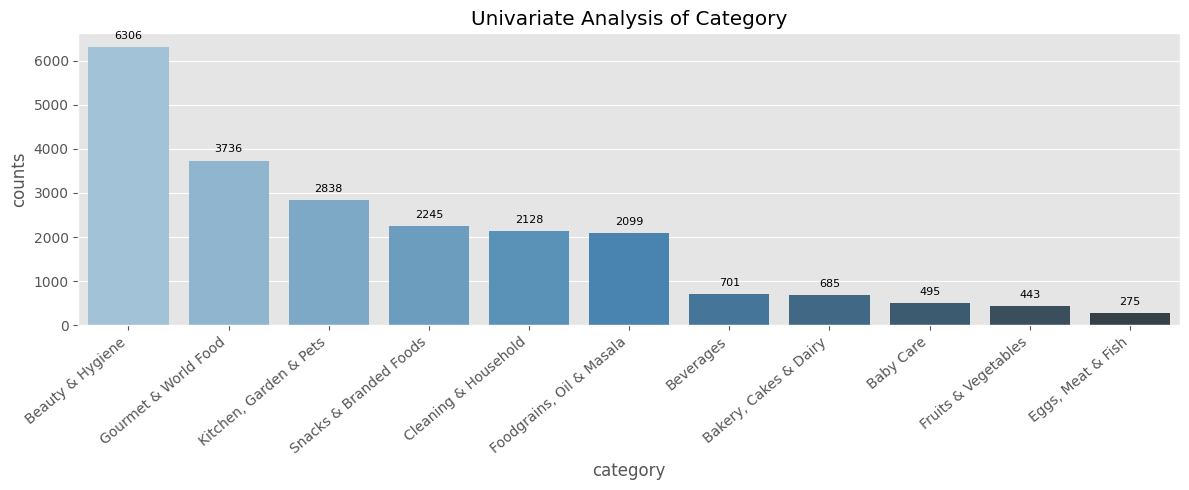

In [76]:
plt.figure(figsize=(12,5))
ax=sns.barplot(x='category',y='counts',data=d1,palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha="right")
for bar in ax.patches: # annotating bar graph 
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
    

ax.set_title('Univariate Analysis of Category') 
plt.tight_layout()
plt.show()

In [77]:
# For feature 'sub_category'
data_train['sub_category'].describe()

count         21951
unique           90
top       Skin Care
freq           1814
Name: sub_category, dtype: object

In [78]:
data_train['sub_category'].value_counts()

sub_category
Skin Care                   1814
Health & Medicine            927
Hair Care                    830
Fragrances & Deos            822
Storage & Accessories        821
                            ... 
Mutton & Lamb                 18
Water                         14
Flower Bouquets, Bunches       8
Pork & Other Meats             2
Marinades                      1
Name: count, Length: 90, dtype: int64

In [79]:
data_train['sub_category'].value_counts(normalize=True)*100 # To get percentage

sub_category
Skin Care                   8.263860
Health & Medicine           4.223042
Hair Care                   3.781149
Fragrances & Deos           3.744704
Storage & Accessories       3.740149
                              ...   
Mutton & Lamb               0.082001
Water                       0.063778
Flower Bouquets, Bunches    0.036445
Pork & Other Meats          0.009111
Marinades                   0.004556
Name: proportion, Length: 90, dtype: float64

In [80]:
data_train['sub_category'].unique() # to get unique values of sub_category

array(['Organic Staples', 'Frozen Veggies & Snacks',
       'Rice & Rice Products', 'Cooking & Baking Needs',
       'Drinks & Beverages', 'Fragrances & Deos', 'All Purpose Cleaners',
       'Snacks, Dry Fruits, Nuts', 'Storage & Accessories',
       'Fresheners & Repellents', 'Diapers & Wipes', 'Masalas & Spices',
       'Tea', 'Snacks & Namkeen', 'Party & Festive Needs',
       'Cereals & Breakfast', 'Tinned & Processed Food',
       'Health & Medicine', 'Dry Fruits', 'Pooja Needs', 'Dairy',
       'Appliances & Electricals', 'Hair Care', 'Ready To Cook & Eat',
       'Pet Food & Accessories', 'Skin Care', 'Crockery & Cutlery',
       "Men's Grooming", 'Fish & Seafood', 'Pasta, Soup & Noodles',
       'Organic Fruits & Vegetables', 'Oils & Vinegar',
       'Spreads, Sauces, Ketchup', 'Steel Utensils', 'Bakeware',
       'Oral Care', 'Detergents & Dishwash', 'Bath & Hand Wash',
       'Cakes & Pastries', 'Sauces, Spreads & Dips', 'Fresh Vegetables',
       'Noodle, Pasta, Vermicelli',

In [81]:
#  top 10 sub_categories
subcategory_count=Counter(list(data_train['sub_category']))
subcategory_count.most_common(10)

[('Skin Care', 1814),
 ('Health & Medicine', 927),
 ('Hair Care', 830),
 ('Fragrances & Deos', 822),
 ('Storage & Accessories', 821),
 ('Bath & Hand Wash', 779),
 ('Masalas & Spices', 700),
 ('Crockery & Cutlery', 694),
 ('Snacks, Dry Fruits, Nuts', 677),
 ("Men's Grooming", 648)]

In [82]:
d1=data_train['sub_category'].value_counts().reset_index()[0:10] # selecting top 10 sub categories
d1.columns=['sub_category','counts'] # renaming colimns
d1

,sub_category,counts
0,Skin Care,1814
1,Health & Medicine,927
2,Hair Care,830
3,Fragrances & Deos,822
4,Storage & Accessories,821
5,Bath & Hand Wash,779
6,Masalas & Spices,700
7,Crockery & Cutlery,694
8,"Snacks, Dry Fruits, Nuts",677
9,Men's Grooming,648


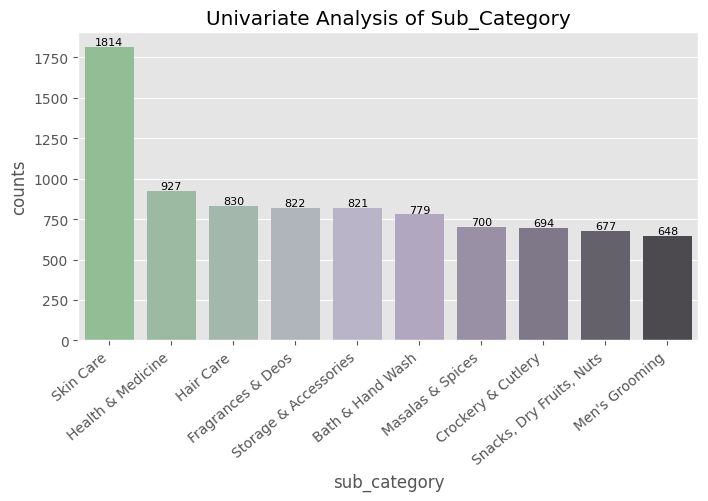

In [83]:
plt.figure(figsize=(8,4))
ax=sns.barplot(x='sub_category',y='counts',data=d1,palette="Accent_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40,ha="right")

# annotating values
for bar in ax.patches: # annotating bar graph 
    ax.annotate(format(bar.get_height(), '.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 3.5),
                   textcoords='offset points')
ax.set_title('Univariate Analysis of Sub_Category') # title the graph

plt.show()

#### Sub-Category:
There are 90 unique sub-categories and Skin care is top occurring with 1814 times
- The top four major sub_categories are as follows

- Skin Care- 8.26%
- Health & Medicine- 4.22%
- Hair Care-3.78%
- Fragrances & Deos — 3.74%

#### Type:
- There are 423 unique types of product
- Face care is the top type of product with 1181 counts- 5.38%

In [84]:
# For Feature 'Brand'
data_train['brand'].describe()

count      21951
unique      2195
top       Fresho
freq         506
Name: brand, dtype: object

In [85]:
#  top 10 brand
brand_count=Counter(list(data_train['brand']))
brand_count.most_common(10)

[('Fresho', 506),
 ('bb Royal', 429),
 ('BB Home', 350),
 ('DP', 194),
 ('Fresho Signature', 133),
 ('bb Combo', 130),
 ('Amul', 120),
 ('GoodDiet', 118),
 ('Dabur', 112),
 ('INATUR ', 111)]

In [86]:
# percentage of top 10 brands
(data_train['brand'].value_counts(normalize=True)*100)[:10]

brand
Fresho              2.305134
bb Royal            1.954353
BB Home             1.594460
DP                  0.883787
Fresho Signature    0.605895
bb Combo            0.592228
Amul                0.546672
GoodDiet            0.537561
Dabur               0.510227
INATUR              0.505672
Name: proportion, dtype: float64

- There are 2195 unique brands
- The brand which has highest number of products is Fresho - 506 counts - 2.3%

In [87]:
# For Feature 'type'
data_train['type'].describe()

count         21951
unique          423
top       Face Care
freq           1181
Name: type, dtype: object

In [88]:
#  top 10 type of products
type_count=Counter(list(data_train['type']))
type_count.most_common(10)

[('Face Care', 1181),
 ('Ayurveda', 444),
 ("Men's Deodorants", 407),
 ('Shampoo & Conditioner', 364),
 ('Containers Sets', 343),
 ('Glassware', 327),
 ('Bathing Bars & Soaps', 308),
 ('Blended Masalas', 306),
 ('Gourmet Tea & Tea Bags', 276),
 ('Body Care', 274)]

In [89]:
# percentage of top 10 types
(data_train['type'].value_counts(normalize=True)*100)[:10]

type
Face Care                 5.380165
Ayurveda                  2.022687
Men's Deodorants          1.854130
Shampoo & Conditioner     1.658239
Containers Sets           1.562571
Glassware                 1.489682
Bathing Bars & Soaps      1.403125
Blended Masalas           1.394014
Gourmet Tea & Tea Bags    1.257346
Body Care                 1.248235
Name: proportion, dtype: float64

- There are 423 unique types of product
- Face care is the top type of product with 1181 counts- 5.38%

#### sale_price

In [90]:
#  top sale_price
saleprice_count=Counter(list(data_train['sale_price']))
saleprice_count.most_common(10)

[(99.0, 325),
 (50.0, 260),
 (199.0, 248),
 (299.0, 240),
 (150.0, 237),
 (60.0, 232),
 (149.0, 203),
 (120.0, 197),
 (225.0, 197),
 (75.0, 194)]

In [91]:
data_train['sale_price'].value_counts().sort_index(ascending=False)

sale_price
12500.00     1
10090.00     1
8184.44      1
7999.00      1
7299.00      1
            ..
7.50         2
6.00         7
5.00        16
3.00         1
2.45         1
Name: count, Length: 2891, dtype: int64

<Axes: xlabel='sale_price', ylabel='Proportion'>

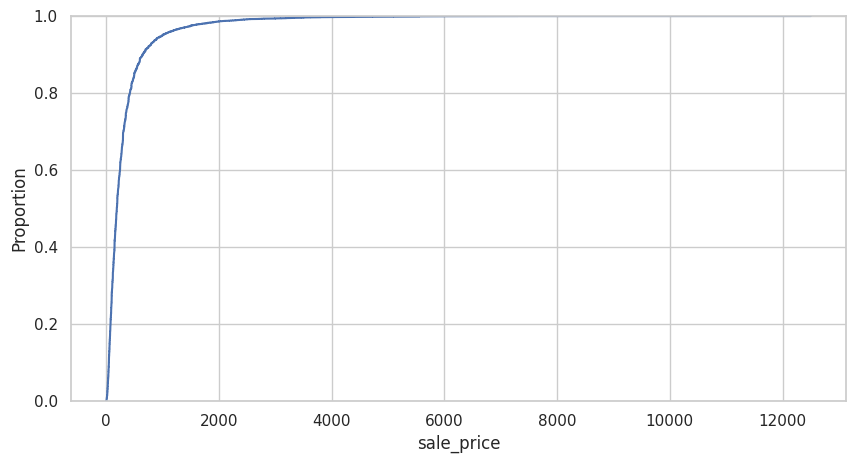

In [92]:
#CDF of sale_price
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.ecdfplot(data_train['sale_price'])

##### 99% of products sale price is below 2000 in train data

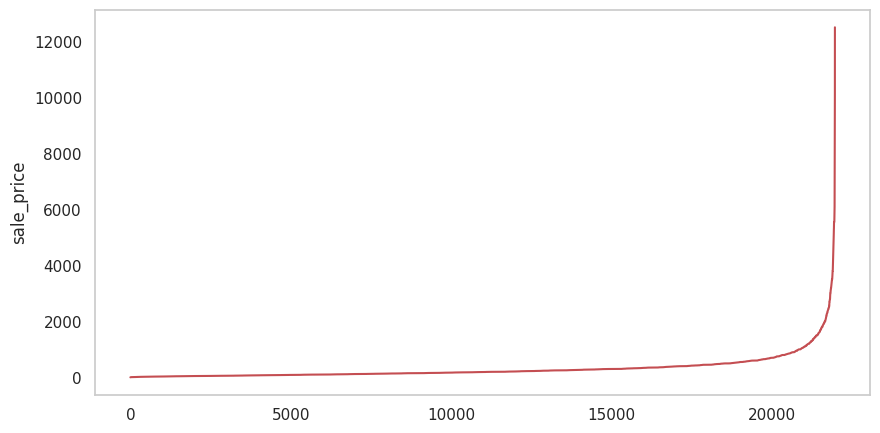

In [93]:
ypoints=np.array(data_train['sale_price'].sort_values())
plt.plot(ypoints,'r-')
plt.ylabel('sale_price')
plt.grid()
plt.show()

- From the above line plot there is a steep change at sale_price 2000(Inflection point)
- So will remove products whose sale_price is above 2000

In [94]:
# data with sale price greater than 
data_saleprice=data_train[data_train['sale_price']>2000]
data_saleprice.shape

(303, 9)

In [95]:
data_train=data_train[data_train['sale_price']<=2000]
print("No. of data points after removing sale_price outliers:",data_train.shape[0])

No. of data points after removing sale_price outliers: 21648


##### Datapoints reduced to 21648 (99.98% of original data)in train data from 21951 after removing products with sale price greater than 2000

### Description feature

In [96]:
data_train['description'].value_counts()

description
A brand inspired by the Greek goddess of victory, it personifies strength, speed and energy and it launched its first perfume in 1929. Since then, a wide assortment of fragrance collections has hit the marketplace with refreshing, and eye-catching proposals that capture the essence and lifestyle of today´s man and woman.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

##### Text preprocessing done on categorical features ; category,sub_category,brand ,type

In [97]:
data_train['description'].isna().sum() # to check for any missing values

0

In [98]:
data_train[data_train['description']==u' '].any().sum() # to check for just space in description

0

Same way done for sub_category,type,brand columns

For Description text preprocessing is also done .
nltk stop words are used to remove stop words in description

In [99]:
import nltk 
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
list of stop words: {'from', 'yourselves', 'if', 'all', 'about', 'now', 'hasn', 'be', 'a', 'against', 'each', "you're", 'what', 'then', 'more', 'isn', 'being', 'such', 'on', 'only', 'too', 'once', 'mustn', 'her', 'those', 'not', 'this', 'herself', 'you', 'below', 've', 'it', "shan't", "aren't", "doesn't", 'don', "don't", 'so', 'theirs', 'needn', 'no', 'did', 'yourself', 'other', 'y', "you've", 'they', "isn't", "shouldn't", 'ourselves', 'my', 'after', "you'd", "it's", 'while', 'by', 'hadn', 's', "needn't", 'up', 'or', 'we', 'some', 're', 'll', 'an', 'before', 'them', "you'll", 'their', 'here', 'should', 'our', 'until', 'themselves', "wouldn't", 'how', 'itself', 'was', 'through', 'as', 'me', "that'll", 'ours', 'few', 'to', 'when', 'd', 'couldn', 'why', 'in', 'mightn', 't', 'hers', 'i', 'but', 'its', 'there', 'she', 'under', "she's", 'both', 'his', 'with', 'of', 'wer

In [100]:
def preprocess_categorical(data,column_name):
    """ fuction to preprocess categorical data column"""
    
    data[column_name]=data[column_name].str.replace('&','_') # replacing & with _
    data[column_name]=data[column_name].str.replace(',','_') # replacing , with _
    data[column_name]=data[column_name].str.replace("'",'') #replacing ' with ''(no space)
    data[column_name]=data[column_name].str.replace(" ",'') # removing white spaces
    data[column_name]=data[column_name].str.lower() # to lower case
    data[column_name]=data[column_name].str.strip() # removing trailing and leading white space
    
    return data[column_name]

##### The above function preprocesses a column by doing the steps as mentioned in code

In [101]:
data_train['category']=preprocess_categorical(data_train,'category')

In [102]:
data_train['category'].unique()

array(['foodgrains_oil_masala', 'snacks_brandedfoods',
       'gourmet_worldfood', 'beauty_hygiene', 'cleaning_household',
       'kitchen_garden_pets', 'babycare', 'beverages',
       'bakery_cakes_dairy', 'eggs_meat_fish', 'fruits_vegetables'],
      dtype=object)

In [103]:
data_train['sub_category']=preprocess_categorical(data_train,'sub_category')

In [104]:
data_train['sub_category'].unique()

array(['organicstaples', 'frozenveggies_snacks', 'rice_riceproducts',
       'cooking_bakingneeds', 'drinks_beverages', 'fragrances_deos',
       'allpurposecleaners', 'snacks_dryfruits_nuts',
       'storage_accessories', 'fresheners_repellents', 'diapers_wipes',
       'masalas_spices', 'tea', 'snacks_namkeen', 'party_festiveneeds',
       'cereals_breakfast', 'tinned_processedfood', 'dryfruits',
       'health_medicine', 'poojaneeds', 'dairy', 'appliances_electricals',
       'haircare', 'readytocook_eat', 'petfood_accessories', 'skincare',
       'crockery_cutlery', 'mensgrooming', 'fish_seafood',
       'pasta_soup_noodles', 'organicfruits_vegetables',
       'spreads_sauces_ketchup', 'steelutensils', 'bakeware', 'oralcare',
       'detergents_dishwash', 'bath_handwash', 'cakes_pastries',
       'sauces_spreads_dips', 'freshvegetables',
       'noodle_pasta_vermicelli', 'bins_bathroomware',
       'mops_brushes_scrubs', 'chocolates_biscuits',
       'healthdrink_supplement', 'brea

In [105]:
data_train['brand']=preprocess_categorical(data_train,'brand')

In [106]:
data_train['brand'].nunique()

2158

In [107]:
data_train['type']=preprocess_categorical(data_train,'type')

In [108]:
data_train['type'].nunique()

422

In [109]:
from tqdm import tqdm
import re
def preprocess_description(text):
    """ Function which does preprocesiing on prodcut title feature,
        removes stopwords, replaces special character with space, converts to lower case,
    """
    preprocessed_description=[]
    for description in tqdm(text):
        
        #Delete all the data which are present in the brackets
        description = re.sub(r'\([^()]*\)',' ',description)
        
        #removing urls
        description = re.sub(r'http\S+',' ',description)
        description = re.sub('[^A-Za-z]+', ' ', description) # remove all characters except a-z and A-Z and replace with white space
        description = ' '.join(word for word in description.split() if word.lower() not in stop_words) # removing stop words
        description = ' '.join(word for word in description.split() if len(word)>2) # removing single letter and two letter words
        description = description.lower().strip()
        preprocessed_description.append(description)
        
    return preprocessed_description

##### The above code cell takes the description text and does the preprocessing as defined in the above function

In [110]:
preprocessed_description=preprocess_description(data_train['description'].values)

100%|██████████| 21648/21648 [00:02<00:00, 9476.50it/s]


In [111]:
data_train['description']=preprocessed_description

In [112]:
data_train

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%
0,Flour - Corn,foodgrains_oil_masala,organicstaples,organictattva,organicflours,per calories fat,57.00,60.0,0.050000
1,Veg. Burger Patty,snacks_brandedfoods,frozenveggies_snacks,yummiez,frozenvegsnacks,real good veg burger patty choice eating beefy...,125.00,125.0,0.000000
2,Dosa Rice/Akki,foodgrains_oil_masala,rice_riceproducts,supersaver,rawrice,rice dosa easy make premium dosa mix used make...,199.00,225.0,0.115556
3,Skimmed Milk Powder,gourmet_worldfood,cooking_bakingneeds,puramate,baking_cakedecorations,puramate skimmed milk powder makes wholesome m...,58.50,65.0,0.100000
4,Kiwi Drink,gourmet_worldfood,drinks_beverages,alafresh,gourmetjuices_drinks,ala fresh kiwi fruit drink refreshing fruit dr...,10.00,10.0,0.000000
...,...,...,...,...,...,...,...,...,...
21946,Tea Tree Anti Imperfection Daily Solution,beauty_hygiene,skincare,biotique,facecare,biotique tea tree anti imperfection daily solu...,420.00,560.0,0.250000
21947,Intimate Lightening Serum,beauty_hygiene,skincare,namyaa,intimatewash_care,adore flawless skin wish perfect skin tone fee...,750.00,750.0,0.000000
21948,Paw'sitively Smooth Paw Butter For Dogs,kitchen_garden_pets,petfood_accessories,captainzack,petcleaning_grooming,paw sitively smooth protects lovely pooch paws...,350.00,350.0,0.000000
21949,Colorsilk Hair Colour With Keratin,beauty_hygiene,haircare,revlon,haircolor,colorsilk ammonia permanent hair colour infuse...,413.25,435.0,0.050000


In [113]:
print('Printing some random description values')
print('-'*50)
print('[9]',data_train['description'][9])
print('-'*50)
print('[288]',data_train['description'][288])
print('-'*50)
print('[457]',data_train['description'][457])
print('-'*50)

Printing some random description values
--------------------------------------------------
[9] lunch box elegant trendy product asian plastics outer body lid made food grade material inner bowl lid made top quality stainless steel keeping food fresh longer period time lunch box also comes handle easy carrying
--------------------------------------------------
[288] britannia treat wafers strawberry discovering journey taste filled layers crispy wafers strawberry flavour gives taste buds delectable taste crunchiness wafers adds newness believing delivering fresh healthy products britannia india manufactures india favourite brands like tiger nutrichoice bourbon good day milk bikis little hearts
--------------------------------------------------
[457] aloe veda lavender face cleanser tea tree oil oil free non comedogenic formula containing active ingredients destroy bacteria face pores lead breakouts inflammation mild enough cause irritation inflammation skin oil free non comedogenic clog

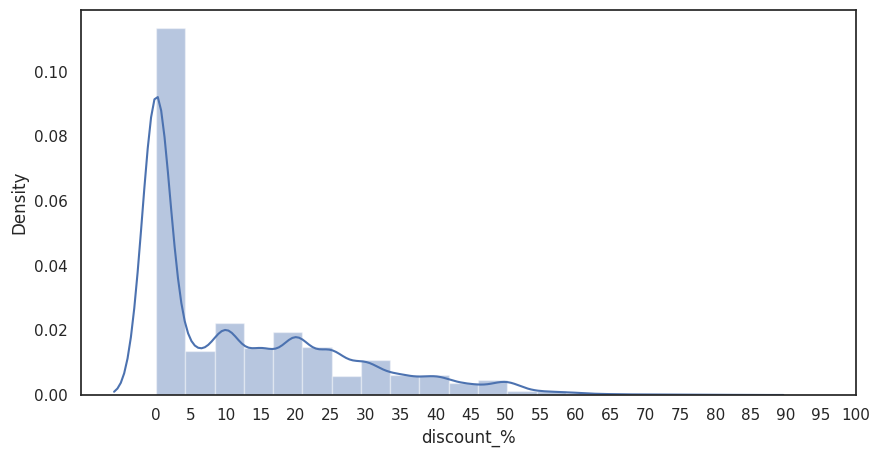

In [114]:
# Univariate analysis of discount_%
#Plotting of discount_% variable
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
g=sns.distplot(data_train['discount_%']*100,bins=20)
g.set_xticks(np.arange(0,101,5))

<Axes: xlabel='discount_%', ylabel='Proportion'>

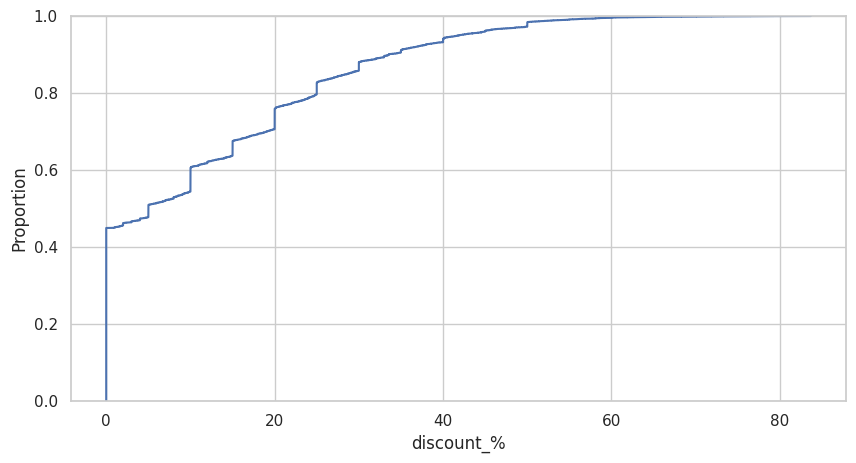

In [115]:
#CDF of discount_%
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('whitegrid')
sns.ecdfplot(data_train['discount_%']*100)

- Approx 46% of products have No discount(zero discount)
- Maximum discount for a product is 60% which is only for a small potion of total products(i.e,~1%)
- ~ 30% of products have discount from 1 to 20%
- ~ 15% of products have discount in range of 21-40% of market_price

#### Basic Feature Extraction and its importance:
- Discount_% feature is built by using sale_price and market_price from the given data for model building (i.e, market price-sell price/market price)

By this we can have discount range of products in finding similar products of the queried one

#### Advanced Feature Extraction and it’s Importance:
As part of Advanced Feature Extraction , we will do clustering for the train data ;add cluster label as a feature. Also save the cluster means as pickle file to assign a query point/unseen point to the nearest cluster mean and label it for that cluster

For clustering we will be using Scaled sale_price (standardized using min-max scaler), discount_% and sentiment scores obtained from preprocessed description text.

### Clustering Analysis

##### will compute sentiment scores for description text which we will use in clustering analysis

In [116]:
# computing sentiment score for description feature
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [117]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm import tqdm

In [118]:
sia=SentimentIntensityAnalyzer()

# saving sentiment scores in list 
negative=[]
neu=[]
pos=[]
compound=[]

for description in tqdm(data_train['description']):
    i=sia.polarity_scores(description)['neg']
    j=sia.polarity_scores(description)['neu']
    k=sia.polarity_scores(description)['pos']
    l=sia.polarity_scores(description)['compound']
    negative.append(i)
    neu.append(j)
    pos.append(k)
    compound.append(l)

100%|██████████| 21648/21648 [01:23<00:00, 259.89it/s]


In [119]:
# adding sentiment intensity analyser scores to dataframe as columns
data_train['negative']=negative
data_train['neutral']=neu
data_train['positive']=pos
data_train['compound']=compound

In [120]:
data_train['sale_price'].describe()

count    21648.000000
mean       279.441729
std        295.756692
min          2.450000
25%         94.500000
50%        189.000000
75%        349.000000
max       2000.000000
Name: sale_price, dtype: float64

In [121]:
sale_price_min=data_train['sale_price'].min()
sale_price_min

2.45

In [122]:
sale_price_max=data_train['sale_price'].max()
sale_price_max

2000.0

In [123]:
# scaling the sale price using min max scaler and aading it as new column to dataframe
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_train['sale_price_scaled']=scaler.fit_transform(data_train['sale_price'].values.reshape(-1,1))
data_train.head()

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%,negative,neutral,positive,compound,sale_price_scaled
0,Flour - Corn,foodgrains_oil_masala,organicstaples,organictattva,organicflours,per calories fat,57.0,60.0,0.050000,0.0,1.000,0.000,0.0000,0.027308
1,Veg. Burger Patty,snacks_brandedfoods,frozenveggies_snacks,yummiez,frozenvegsnacks,real good veg burger patty choice eating beefy...,125.0,125.0,0.000000,0.0,0.611,0.389,0.9484,0.061350
2,Dosa Rice/Akki,foodgrains_oil_masala,rice_riceproducts,supersaver,rawrice,rice dosa easy make premium dosa mix used make...,199.0,225.0,0.115556,0.0,0.811,0.189,0.8126,0.098396
3,Skimmed Milk Powder,gourmet_worldfood,cooking_bakingneeds,puramate,baking_cakedecorations,puramate skimmed milk powder makes wholesome m...,58.5,65.0,0.100000,0.0,0.780,0.220,0.9723,0.028059
4,Kiwi Drink,gourmet_worldfood,drinks_beverages,alafresh,gourmetjuices_drinks,ala fresh kiwi fruit drink refreshing fruit dr...,10.0,10.0,0.000000,0.0,0.667,0.333,0.8402,0.003780


In [124]:
data_train[['sale_price_scaled','discount_%','negative','neutral','positive','compound']].describe()

,sale_price_scaled,discount_%,negative,neutral,positive,compound
count,21648.000000,21648.000000,21648.000000,21648.000000,21648.000000,21648.000000
mean,0.138666,0.118632,0.038257,0.670894,0.290848,0.776339
std,0.148060,0.147265,0.055506,0.131387,0.125547,0.311236
min,0.000000,0.000000,0.000000,0.108000,0.000000,-0.982000
25%,0.046081,0.000000,0.000000,0.584000,0.214000,0.735100
50%,0.093389,0.050000,0.000000,0.664000,0.294000,0.907300
75%,0.173488,0.200000,0.061000,0.748000,0.372000,0.964800
max,1.000000,0.836667,0.630000,1.000000,0.892000,0.999800


In [125]:
X_train = np.hstack((data_train['sale_price_scaled'].values.reshape(-1,1),data_train['discount_%'].values.reshape(-1,1), \
           data_train['negative'].values.reshape(-1,1),data_train['neutral'].values.reshape(-1,1), \
           data_train['positive'].values.reshape(-1,1),data_train['compound'].values.reshape(-1,1)))

In [126]:
X_train.shape

(21648, 6)

In [127]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # to evaluate clustering performance

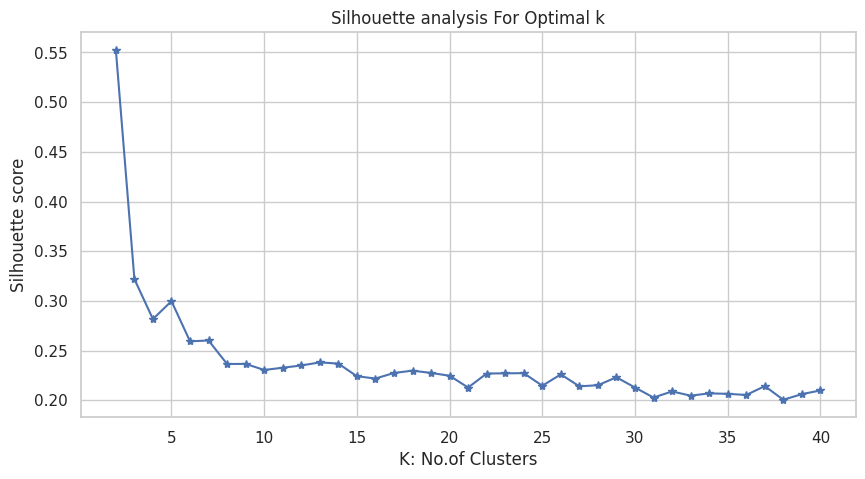

In [128]:
silhouette_scr=[]
K=range(2,41)
for k in K:
    kmeans=KMeans(n_clusters=k,n_init=12,max_iter=200) # setting KMeans cluster with 12 different centriod initializations & 200 iterations for a single run
    kmeans=kmeans.fit(X_train)
    labels=kmeans.labels_
    
    # silhouette score
    silhouette_scr.append(silhouette_score(X_train,labels))

plt.plot(K,silhouette_scr,'b*-')
plt.xlabel('K: No.of Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

##### For a good clustering silhouette score should be as close as to 1, but in our case the K with maximum silhouette score is 2, for optimum number of clusters will choose 5 as best_k by elbow method

Will cluster our data into 5 groups as per silhouette score and elbow method and label them accordingly

In [129]:
best_k=5
kmeans=KMeans(n_clusters=best_k,n_init=12,max_iter=200) # setting KMeans cluster with 12 different centriod initializations & 200 iterations for a single run
kmeans=kmeans.fit(X_train)

In [130]:
labels=kmeans.labels_ # labels for each product given by clustering model
len(labels)

21648

In [131]:
# getting centroids
cluster_centers=kmeans.cluster_centers_
cluster_centers

array([[ 0.54929662,  0.12000478,  0.03497403,  0.64243675,  0.3225779 ,
         0.90697523],
       [ 0.10503919,  0.03633853,  0.03244251,  0.61664717,  0.35090942,
         0.92252807],
       [ 0.10341517,  0.0924754 ,  0.04169367,  0.77016063,  0.18814625,
         0.57100473],
       [ 0.1089326 ,  0.0897899 ,  0.08707826,  0.8467507 ,  0.06616266,
        -0.08630598],
       [ 0.11738512,  0.31755513,  0.03054932,  0.65160133,  0.31785102,
         0.9090449 ]])

In [132]:
from sklearn.manifold import TSNE

##### T-SNE visualization of cluster analysis for better understanding

In [134]:
tsne = TSNE(n_components=2, random_state=0,perplexity=50,n_iter=500) 

projections=tsne.fit_transform(X_train)

# creating a new data fram which help us in ploting the result data
tsne_data = np.vstack((projections.T, labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

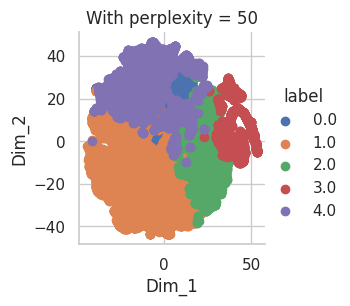

In [135]:
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.title('With perplexity = 50')
plt.show()

In [136]:
# inserting cluster_label as column 
data_train['cluster_label']=labels
data_train.head()

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%,negative,neutral,positive,compound,sale_price_scaled,cluster_label
0,Flour - Corn,foodgrains_oil_masala,organicstaples,organictattva,organicflours,per calories fat,57.0,60.0,0.050000,0.0,1.000,0.000,0.0000,0.027308,3
1,Veg. Burger Patty,snacks_brandedfoods,frozenveggies_snacks,yummiez,frozenvegsnacks,real good veg burger patty choice eating beefy...,125.0,125.0,0.000000,0.0,0.611,0.389,0.9484,0.061350,1
2,Dosa Rice/Akki,foodgrains_oil_masala,rice_riceproducts,supersaver,rawrice,rice dosa easy make premium dosa mix used make...,199.0,225.0,0.115556,0.0,0.811,0.189,0.8126,0.098396,2
3,Skimmed Milk Powder,gourmet_worldfood,cooking_bakingneeds,puramate,baking_cakedecorations,puramate skimmed milk powder makes wholesome m...,58.5,65.0,0.100000,0.0,0.780,0.220,0.9723,0.028059,1
4,Kiwi Drink,gourmet_worldfood,drinks_beverages,alafresh,gourmetjuices_drinks,ala fresh kiwi fruit drink refreshing fruit dr...,10.0,10.0,0.000000,0.0,0.667,0.333,0.8402,0.003780,1


In [137]:
df = data_train.copy()

In [138]:
df.columns

Index(['product', 'category', 'sub_category', 'brand', 'type', 'description',
       'sale_price', 'market_price', 'discount_%', 'negative', 'neutral',
       'positive', 'compound', 'sale_price_scaled', 'cluster_label'],
      dtype='object')

In [140]:
df.shape

(21648, 15)

##### will vectorize preprocessed description text with tfidf weighted W2V

In [142]:
# tfidf vectorizer
tfidf=TfidfVectorizer()
tfidf_description=tfidf.fit_transform(df['description'])

In [144]:
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf.get_feature_names_out(), list(tfidf.idf_)))
tfidf_words = set(tfidf.get_feature_names_out())

#### tfidf_W2V vectorization of preprocessed description feature

Will use TF-IDF weighted Word2Vec representation of description text for featurization of text data to numerical data as ML models take numerical inputs

Will use GloVe: Global Vectors (300 dimensions) for Word Representation for our featurization
The link for downloading pretrained glove word embeddings is:
https://nlp.stanford.edu/projects/glove/

In [147]:
# loading glove vectors for w2v dimensions
with open(r'/kaggle/input/glov-vec/glove_vectors.pkl','rb') as f:
    model=pickle.load(f)
    glove_words=set(model.keys()) # creating set of words in glove file

In [148]:
#vectorizing train  data using tfidf-W2v
# average Word2Vec
# compute tfidf word2vec for each description.
from tqdm import tqdm
description_tfidf_w2v_vectors = []; # the avg-w2v for each description is stored in this list
for description in tqdm(df['description']): # for each description
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the description
    for word in description.split(): # for each word in description
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((description.count(word)/len(product.split())))
            tf_idf = dictionary[word]*(description.count(word)/len(description.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    description_tfidf_w2v_vectors.append(vector)

100%|██████████| 21648/21648 [00:14<00:00, 1542.74it/s]


The TF-IDF weighted Word2Vec of all preprocessed description text of train data are stored in a list as shown in above code for using it in computing item-item cosine similarity

In [149]:
len(description_tfidf_w2v_vectors)

21648

#### Label encoding categorical features 'category', 'sub_category', 'brand', 'type'

In [152]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns, encoders=None):
    if encoders is None:
        encoders = {}
    
        for col in columns:
            unique_values = list(df[col].unique())
            unique_values.append('Unseen')
            le = LabelEncoder().fit(unique_values)
            df[col] = le.transform(df[[col]])
            encoders[col] = le
    
    else:
        for col in columns:
            le = encoders.get(col)
            df[col] = [x if x in le.classes_ else 'Unseen' for x in df[col]]
            df[col] = le.transform(df[[col]])

    return df, encoders

In [153]:
columns=['category', 'sub_category', 'brand', 'type']
df, encoders=label_encode_columns(df, columns, encoders=None)

In [154]:
le_for_test=encoders # saving encoders for test data
le_for_test

{'category': LabelEncoder(),
 'sub_category': LabelEncoder(),
 'brand': LabelEncoder(),
 'type': LabelEncoder()}

While Label encoding categorical columns ,fit is done on train data and for any unseen label in test data ,will be labelled as (n+1)th ,for n unique values in train data.
Encoders returned from the functioned are stored for encoding test data/query data points

In [155]:
df.head()

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%,negative,neutral,positive,compound,sale_price_scaled,cluster_label
0,Flour - Corn,7,69,1445,302,per calories fat,57.0,60.0,0.050000,0.0,1.000,0.000,0.0000,0.027308,3
1,Veg. Burger Patty,11,46,2138,176,real good veg burger patty choice eating beefy...,125.0,125.0,0.000000,0.0,0.611,0.389,0.9484,0.061350,1
2,Dosa Rice/Akki,7,77,1876,349,rice dosa easy make premium dosa mix used make...,199.0,225.0,0.115556,0.0,0.811,0.189,0.8126,0.098396,2
3,Skimmed Milk Powder,9,21,1570,30,puramate skimmed milk powder makes wholesome m...,58.5,65.0,0.100000,0.0,0.780,0.220,0.9723,0.028059,1
4,Kiwi Drink,9,31,56,193,ala fresh kiwi fruit drink refreshing fruit dr...,10.0,10.0,0.000000,0.0,0.667,0.333,0.8402,0.003780,1


#### will build a matrix from train data to compute cosine similarity

In [156]:
# stacking all encoded categorical features, vectorized description text and scaled sael price,discount% and sentiment scores
X_train=np.hstack((description_tfidf_w2v_vectors,df['category'].values.reshape(-1,1),df['sub_category'].values.reshape(-1,1),df['brand'].values.reshape(-1,1), \
                  df['type'].values.reshape(-1,1),df['sale_price_scaled'].values.reshape(-1,1),df['discount_%'].values.reshape(-1,1), \
                  df['negative'].values.reshape(-1,1),df['neutral'].values.reshape(-1,1),df['positive'].values.reshape(-1,1), \
                  df['compound'].values.reshape(-1,1),df['cluster_label'].values.reshape(-1,1)))

In [157]:
X_train.shape

(21648, 311)

# Model Building : Item- Item based Collaborative Filtered recommender system
- will give attributes of query product
- query product should have category,sub_category,brand,type,description,sale_price,market_price
- using the above features will do encoding,vectorizing ,scale sale price to train data,compute discount_%, calculate sentiment scores, and assign to nearest cluster

In [158]:
# function to check all features are given for query product
def missing_features(data):
    """to check any missing or blank or nan values in qury product """
    data.replace('None',np.nan,inplace=True) # replace None with Nan
    data.replace(r'^\s*$',np.nan,regex=True,inplace=True) # replace empty string with NaN
    
   # first to check whether the data has the 8 listed columns[category,sub_category,brand,type,description,sale_price,market_price]
   # to check for any missing values
    if(data.shape[1]<7) or data.isna().any().any():
        print('Please check datapoint\n')
        print('The data has missing values in'+ str(list(data.columns[data.isna().any()]))+ 'columns')
        
        return False
    else:
        return True

In [160]:
# function to check for sale price range 
sale_price_minima=df['sale_price'].min()-(df['sale_price'].min()*0.15) # 15 less than min 
sale_price_maxima=df['sale_price'].max()+(df['sale_price'].max()*0.15)
print(sale_price_minima,'\t',sale_price_maxima)

2.0825 	 2300.0


In [161]:
def salepricecheck(data,train_data):
    '''function to check data has sale price relavant to other produts in same brand or whole train data'''
    if data['sale_price'].values.size!=0: #https://stackoverflow.com/questions/11295609/how-can-i-check-whether-a-numpy-array-is-empty-or-not
        if data['brand'].notna().all():
            g=train_data.groupby(['brand'])['sale_price'] # grouping train data based on brand to get group of query product brand
            minimum=g.get_group((data['brand'].values[0])).min() # getting minimum sale price of query product brand in train data
            minimum = minimum-(minimum*0.15) # 15% tolerance
            
            maximum=g.get_group((data['brand'].values[0])).max()
            maximum = maximum + (maximum*0.15)
            
            if minimum <= float(data['sale_price'].values[0]) <= maximum:
                return True
            else:
                print('The sale_price of query product is not in range of other products in same brand,Check sale_price')
                return False
        else:
            if sale_price_minima <= float(data['sale_price'].values[0]) <= sale_price_maxima: # if brand is not available then will see in whole train data
                return True
            else:
                print('The sale_price of query product is not in range of train data products,please check sale_price')
                return False
    else:
        print('No sale_price for query product given')    
        return False
    

In [162]:
# function to get sentiment scores 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def get_scores(data):
    """retuens sentiment analysis scores for description feature"""
    sia=SentimentIntensityAnalyzer()
    
    negative=[]
    neu=[]
    pos=[]
    compound=[]
    if 'description' in data.columns:
        for value in (data['description']):
            i=sia.polarity_scores(value)['neg']
            j=sia.polarity_scores(value)['neu']
            k=sia.polarity_scores(value)['pos']
            l=sia.polarity_scores(value)['compound']
            
            negative.append(i)
            neu.append(j)
            pos.append(k)
            compound.append(l)
            
    data['negative']=negative
    data['neutral']=neu
    data['positive']=pos
    data['compound']=compound
    
    return data       

In [163]:
# function to get tfidf weighted word2vec

def get_tfidf_w2v(data):
    """retuens tfidf weighted w2v for description feature"""
    
    description_tfidf_w2v_vectors = []; # the avg-w2v for each description is stored in this list
    if 'description' in data.columns:
        for description in (data['description']):
            vector = np.zeros(300) # as word vectors are of zero length
            tf_idf_weight =0; # num of words with a valid vector in the description
            for word in description.split(): # for each word in description
                if (word in glove_words) and (word in tfidf_words):
                    vec = model[word] # getting the vector for each word
                    # here we are multiplying idf value(dictionary[word]) and the tf value((description.count(word)/len(product.split())))
                    tf_idf = dictionary[word]*(description.count(word)/len(description.split())) # getting the tfidf value for each word
                    vector += (vec * tf_idf) # calculating tfidf weighted w2v
                    tf_idf_weight += tf_idf
            if tf_idf_weight != 0:
                vector /= tf_idf_weight
            description_tfidf_w2v_vectors.append(vector)
    
    return description_tfidf_w2v_vectors
            

The text preprocessing of categorical features (category,sub_category,brand,type) and text of description of query product is done in same way as for train data by defining functions for same

The query data point is assigned to nearest(euclidean distance) one among the five cluster means which are obtained by using train data for optimal K in Advance Feature Engineering part

In [164]:
# function to preprocess categorical text features category,sub_category,brand,type

def categorical_preprocess(text):
    """to preprocess categorical features,use .apply for applying function"""
    text=text.str.replace('&','_') # replacing & with _
    text=text.str.replace(',','_') # replacing , with _
    text=text.str.replace("'",'') #replacing '' with ''(no space)
    text=text.str.replace(" ",'') # removing white spaces
    text=text.str.lower() # to lower case
    text=text.str.strip() # removing trailing and leading white space
    
    return text

In [165]:
# function to preprocess description text feature

def preprocess_description(text):
    """ Function which does preprocesiing on prodcut title feature,
        removes stopwords, replaces special character with space, converts to lower case,
    """
    preprocessed_description=[]
    for description in text:
        
        #Delete all the data which are present in the brackets
        description = re.sub(r'\([^()]*\)',' ',description)
        
        #removing urls
        description = re.sub(r'http\S+',' ',description)
        description = re.sub('[^A-Za-z]+', ' ', description) # remove all characters except a-z and A-Z and replace with white space
        # https://gist.github.com/sebleier/554280
        description = ' '.join(word for word in description.split() if word.lower() not in stop_words) # removing stop words
        description = ' '.join(word for word in description.split() if len(word)>2) # removing single letter and two letter words
        description = description.lower().strip()
        preprocessed_description.append(description)
        
    return preprocessed_description

In [166]:
# loading cluster centres(means) on train data
with open ('/kaggle/input/clus-cent/cluster_centers.pkl','rb') as f:
    cluster_centers=pickle.load(f)
    
def get_clusterlabel(X,means=cluster_centers):
    minimum=sys.maxsize # initializing minimum as maximum integer so that the distances will be less than that
    index=-1
    for i in range(len(means)):
        dis=np.linalg.norm(X - means[i]) #https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
        
        if (dis<minimum):
            minmum=dis
            index=i
            
    return index

##### function to give similar products from train_data for query product

Now after the text preprocessing, building advance features, of query point we compute cosine similarity of the query product with other products in train data and recommend the similar products with highest cosine similarity

In [167]:
from sklearn.preprocessing import MinMaxScaler
import sys

def get_similar_products(query,train_data,X_train=X_train,num_results=11):
    
    # query: query product
    # train_data: preprocessed train data with all features
    #X_train: matrix to compute cosine similarity
    # num_results: number of similar products to show
    
    if missing_features(query):
        
        # preprocessing categorical columns
        query[['category','sub_category','brand','type']]=query[['category','sub_category','brand','type']].apply(categorical_preprocess)
        
        # encoding categorical features category,sub_category,brand,type
        columns=['category', 'sub_category', 'brand', 'type']
        query, encoders=label_encode_columns(query, columns, le_for_test) # using encoders =encoders got by fitting on
        
        if salepricecheck(query,train_data):
            # preprocessing description
            query['description']=preprocess_description(query['description'].values)
        
            #calculating discount_%
            if 'discount_%' not in query.columns:
                query['discount_%']=(query['market_price']-query['sale_price'])/query['market_price']
        
            query=get_scores(query) # to get sentiment scores
        
            # scaling sale price
            scaler = MinMaxScaler()
            scaler.fit(train_data['sale_price'].values.reshape(-1,1))
            query['sale_price_scaled']=scaler.transform(query['sale_price'].values.reshape(-1,1))
        
            # to get cluster label
            X_q=np.hstack((query['sale_price_scaled'].values.reshape(-1,1),query['discount_%'].values.reshape(-1,1), \
                           query['negative'].values.reshape(-1,1),query['neutral'].values.reshape(-1,1), \
                           query['positive'].values.reshape(-1,1),query['compound'].values.reshape(-1,1)))
        
            query['cluster_label']=get_clusterlabel(X_q) # function to classify item to nearest means(cluster_centres)
        
            tfidf_w2v_vector=get_tfidf_w2v(query) # function to vectorize description text after preprocessing
        
            
            # stacking all values
            #https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate
            X=np.hstack((tfidf_w2v_vector,query['category'].values.reshape(-1,1),query['sub_category'].values.reshape(-1,1), \
                         query['brand'].values.reshape(-1,1),query['type'].values.reshape(-1,1), \
                         query['sale_price_scaled'].values.reshape(-1,1),query['discount_%'].values.reshape(-1,1), \
                         query['negative'].values.reshape(-1,1),query['neutral'].values.reshape(-1,1), \
                         query['positive'].values.reshape(-1,1),query['compound'].values.reshape(-1,1), \
                         query['cluster_label'].values.reshape(-1,1)))
        
            # till now we have preprocessed and vectorized query product
            # now will compute cosine similarities and suggest similar products based on cosine similarity
            cosine_sim=cosine_similarity(X_train,X)
            # np.argsort will return indices of the nearest products 
            indices = np.argsort(cosine_sim.flatten())[-num_results:-1]
            # -1 given to exclude the searched product itself from showing in recommendations as cosinine similarity will be 1 for same product
            # flipping the indices so that the product with more similarity is shown first
            # argsort will do sorting of indices from smallest to largest value
            indices=np.flip(indices)
            #psimilarity will store the similarity 
            psimilarity  = np.sort(cosine_sim.flatten())[-num_results:-1]
            psimilarity = np.flip(psimilarity)
        
            print('The searched/Queried product is:\n',query['product'].values[0])
            print('\nTop '+str(num_results-1)+' Similar products for "'+'\033[1m'+query['product'].values[0]+'\033[0m' +'" are:')
            print("="*70,'\n')
        
            data=train_data[['product','discount_%']].loc[indices]
            data['similarity']=psimilarity.tolist() # adding similarity scores as a new column to data
           
            lst=[] # list to store indices after sorting
            for ind in data.index:
                lst.append(ind)
                print(ind,":",data['product'][ind])
                print('Cosine Similarity with queried product is :',np.round(data['similarity'][ind],6))
                print('Discount %: ',np.round(data['discount_%'][ind])) # restoring discount to original scale 
                print('-'*50,'\n')
            
            return train_data.loc[lst]
    else:
        print('Please check query point for any missing or incomplete information')
        

The function takes the query point and does the following steps

- Checks whether the query point has all the needed columns , if not will give a warning message and function exits
- After checking for any missing columns , it does preprocessing for categorical columns(category,sub_category,brand,type) and then encode with transform using label encoders which are fit on train data
- Next check is done on sale_price whether the sale price is in +-15% of maximum sale price of the same brand in train data , if not function exits with a message -salepricecheck function
- Preprocessing of description text of query point using preprocess_description function
- discount_% is computed after sale_price check
- Get sentiment scores of preprocessed query’s description and scaling sale price with min and max of train data
- Assigning cluster label using cluster means from train data
- Now stacking all vectors and features of query product and compute cosine similarity with products in train data
- Returning top n similar product based on cosine similarity

#### checking for some random query products

In [175]:
product_info = {
    'product': 'Kantan Watermelon Slice',
    'category': 'Gourmet & World Food',
    'sub_category': 'Chocolates & Biscuits',
    'brand': 'Fini',
    'type': 'Marshmallow, Candy, Jelly',
    'description': 'Fini Fizzy Watermelon Slices containing fizzy ...',
    'sale_price': 110.0,
    'market_price': 110.0
}
query = pd.DataFrame([product_info])

In [176]:
query

,product,category,sub_category,brand,type,description,sale_price,market_price
0,Kantan Watermelon Slice,Gourmet & World Food,Chocolates & Biscuits,Fini,"Marshmallow, Candy, Jelly",Fini Fizzy Watermelon Slices containing fizzy ...,110.0,110.0


In [171]:
le_for_test['category'].classes_

array(['Unseen', 'babycare', 'bakery_cakes_dairy', 'beauty_hygiene',
       'beverages', 'cleaning_household', 'eggs_meat_fish',
       'foodgrains_oil_masala', 'fruits_vegetables', 'gourmet_worldfood',
       'kitchen_garden_pets', 'snacks_brandedfoods'], dtype='<U21')

In [172]:
query['category']

0    Gourmet & World Food
Name: category, dtype: object

In [177]:
# get similar products
similar_products=get_similar_products(query,df,X_train=X_train,num_results=11)
similar_products

The searched/Queried product is:
 Kantan Watermelon Slice

Top 10 Similar products for "Kantan Watermelon Slice" are:

8506 : Assam Black Tea
Cosine Similarity with queried product is : 0.999965
Discount %:  0.0
-------------------------------------------------- 

13075 : Mandarin Citrus Handmade Soap
Cosine Similarity with queried product is : 0.999964
Discount %:  0.0
-------------------------------------------------- 

16625 : Insta Fair & Glow Fairness Cream
Cosine Similarity with queried product is : 0.999964
Discount %:  0.0
-------------------------------------------------- 

5774 : Artisan Bread Flour
Cosine Similarity with queried product is : 0.999964
Discount %:  0.0
-------------------------------------------------- 

5895 : Whitening Smooth Skin Women Deodorant For 48h Protection
Cosine Similarity with queried product is : 0.999961
Discount %:  0.0
-------------------------------------------------- 

18589 : Bio Farm Organic Fertiliser
Cosine Similarity with queried produc

,product,category,sub_category,brand,type,description,sale_price,market_price,discount_%,negative,neutral,positive,compound,sale_price_scaled,cluster_label
8506,Assam Black Tea,9,31,1923,195,wholesomeness aroma experience assam black uni...,91.00,130.0,0.300000,0.000,0.706,0.294,0.7845,0.044329,4
13075,Mandarin Citrus Handmade Soap,3,9,1397,38,refreshing zesty fragrance know chinese new ye...,325.00,325.0,0.000000,0.030,0.701,0.269,0.9719,0.161473,1
16625,Insta Fair & Glow Fairness Cream,3,81,2078,155,breakthrough formula enriched mulberry licoric...,61.75,95.0,0.350000,0.070,0.755,0.174,0.4588,0.029686,2
5774,Artisan Bread Flour,9,21,260,166,artisan bread flour premium high protein bread...,600.00,600.0,0.000000,0.000,0.774,0.226,0.7717,0.299141,2
5895,Whitening Smooth Skin Women Deodorant For 48h ...,3,42,1366,421,nivea whitening smooth skin deodorant helps re...,292.59,418.0,0.300024,0.065,0.568,0.367,0.9559,0.145248,4
18589,Bio Farm Organic Fertiliser,10,48,1321,158,use bio farm organic fertiliser see following ...,320.00,320.0,0.000000,0.000,0.665,0.335,0.9022,0.158970,1
21486,Almond & Rose Soap,3,9,864,38,almond rose soap moisturizes cools skin enrich...,92.65,109.0,0.150000,0.062,0.782,0.156,0.5106,0.045155,2
970,Protein Packed Nachos - Peri Peri Masala,11,83,204,83,befikar protein packed nachos loaded original ...,35.00,35.0,0.000000,0.000,0.582,0.418,0.8885,0.016295,1
10965,Total Effects Whip - UV SPF 30,3,81,1417,155,available india whip formulated active rush te...,1699.15,1999.0,0.150000,0.000,0.828,0.172,0.8176,0.849391,0
21605,Fields of Gold - Organic Flaxseeds,7,59,1558,213,flaxseeds rich omega high amount dietary fibre...,38.80,40.0,0.030000,0.088,0.658,0.253,0.8402,0.018197,1


In [183]:
d=pd.DataFrame({'Similar products':similar_products['product'].values})
d.style.set_caption(f'Similar products for: "Kantan Watermelon Slice"').set_table_styles([{'selector':'caption',
                                                                                         'props':[('color','black'),
                                                                                                  ('font-weight', 'bold'),
                                                                                                  ('text-align','left'),
                                                                                                  ('background-color','skyblue'),
                                                                                                 ('font-size', '12px')]}])

,Similar products
0,Assam Black Tea
1,Mandarin Citrus Handmade Soap
2,Insta Fair & Glow Fairness Cream
3,Artisan Bread Flour
4,Whitening Smooth Skin Women Deodorant For 48h Protection
5,Bio Farm Organic Fertiliser
6,Almond & Rose Soap
7,Protein Packed Nachos - Peri Peri Masala
8,Total Effects Whip - UV SPF 30
9,Fields of Gold - Organic Flaxseeds


##### The similar products shown have cosine similarity of 0.99 range